In [1]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
years = list(range(2016, 2023))

In [3]:
cols = ["home_team", "posteam", "posteam_type", "side_of_field", "yardline_100", "half_seconds_remaining", "game_seconds_remaining", "down",
       "ydstogo", "score_differential", "wp", "weather", "roof", "surface", "wind", "home_coach", "away_coach", "desc", "play_type", "pass_length",
       "air_yards", "run_location", "drive", "yrdln", "week", "season", "passer_player_name"]

In [4]:
nfl_df = nfl.import_pbp_data(years, columns = cols, cache = False, alt_path= None)

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.


In [5]:
nfl_df.shape

(341697, 47)

In [6]:
nfl_df.head()

,home_team,posteam,posteam_type,side_of_field,yardline_100,half_seconds_remaining,game_seconds_remaining,down,ydstogo,score_differential,wp,weather,roof,surface,wind,home_coach,away_coach,desc,play_type,pass_length,air_yards,run_location,drive,yrdln,week,passer_player_name,play_id,old_game_id,season,nflverse_game_id,possession_team,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,BAL,None,None,None,NaN,1800.0,3600.0,NaN,0.0,NaN,0.546262,"Partly Cloudy Temp: 84° F, Humidity: 44%, Wind...",outdoors,grass,8.0,John Harbaugh,Rex Ryan,GAME,None,None,NaN,None,NaN,BUF 35,1,None,1.0,2016091101,2016,2016_01_BUF_BAL,,None,None,NaN,None,NaN,,,,0.0,0.0,NaN,NaN,NaN,None,None,None
1,BAL,BAL,home,BUF,35.0,1800.0,3600.0,NaN,0.0,0.0,0.546262,"Partly Cloudy Temp: 84° F, Humidity: 44%, Wind...",outdoors,grass,8.0,John Harbaugh,Rex Ryan,4-Gay kicks 65 yards from BUF 35 to BAL 0. 14-...,kickoff,None,NaN,None,1.0,BUF 35,1,None,36.0,2016091101,2016,2016_01_BUF_BAL,BUF,None,None,NaN,None,NaN,40078;40151;37977;36060;40494;40053;40253;4011...,00-0030041;00-0030073;00-0029799;00-0030433;00...,00-0029892;00-0029895;00-0028497;00-0027539;00...,10.0,11.0,NaN,NaN,NaN,None,None,None
2,BAL,BAL,home,BAL,86.0,1797.0,3597.0,1.0,10.0,0.0,0.536378,"Partly Cloudy Temp: 84° F, Humidity: 44%, Wind...",outdoors,grass,8.0,John Harbaugh,Rex Ryan,(14:57) 29-J.Forsett right end pushed ob at BA...,run,None,NaN,right,1.0,BAL 14,1,None,58.0,2016091101,2016,2016_01_BUF_BAL,BAL,I_FORM,"2 RB, 1 TE, 2 WR",8.0,"4 DL, 3 LB, 4 DB",NaN,38540;41302;40078;35553;38582;43295;40053;4336...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0,NaN,NaN,NaN,None,None,None
3,BAL,BAL,home,BAL,80.0,1772.0,3572.0,2.0,4.0,0.0,0.541975,"Partly Cloudy Temp: 84° F, Humidity: 44%, Wind...",outdoors,grass,8.0,John Harbaugh,Rex Ryan,"(14:32) (No Huddle, Shotgun) 5-J.Flacco pass s...",pass,short,-4.0,None,1.0,BAL 20,1,J.Flacco,85.0,2016091101,2016,2016_01_BUF_BAL,BAL,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",3.0,41302;40078;38540;35553;43295;38582;40053;4336...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0031171;00-0029542;00-0029566;00-0030073;00...,11.0,11.0,-4.53,2.404,0.0,FLAT,None,None
4,BAL,BAL,home,BAL,75.0,1741.0,3541.0,1.0,10.0,0.0,0.546262,"Partly Cloudy Temp: 84° F, Humidity: 44%, Wind...",outdoors,grass,8.0,John Harbaugh,Rex Ryan,"(14:01) (No Huddle, Shotgun) 29-J.Forsett left...",run,None,NaN,left,1.0,BAL 25,1,None,109.0,2016091101,2016,2016_01_BUF_BAL,BAL,SHOTGUN,"2 RB, 1 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",NaN,40078;38540;41302;35553;43295;38582;40053;4336...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0,NaN,NaN,NaN,None,None,None


In [7]:
# get rid of special teams plays
nfl_clean = nfl_df[(nfl_df['play_type'] == 'pass') | (nfl_df['play_type'] == 'run')].reset_index(drop=True)

In [8]:
nfl_clean.shape

(239535, 47)

In [9]:
# make yardline yards to distance to endzone
yards_to_end = []
for i in range(len(nfl_clean)):
    if nfl_clean['posteam'][i] == nfl_clean["yrdln"][i].split(" ")[0]:
        yards_to_end.append(100 - int(nfl_clean['yrdln'][i].split(" ")[1]))
    else:
        yards_to_end.append(nfl_clean['yrdln'][i].split(" ")[1])
        

In [10]:
nfl_clean['yds_to_endzone'] = yards_to_end

In [11]:
# check for rain
rain_type = ['Rain', 'Raining', 'Rainy', 'Showers']
weather_type=[]
for w in nfl_clean['weather']:
    if w:
        if w.split(" ")[0] in rain_type:
            weather_type.append("Rain")
        elif w.split(" ")[0] == "Snow":
            weather_type.append("Snow")
        else:
            weather_type.append("None")
    else:
        weather_type.append("None")

In [12]:
nfl_clean['Precipitation'] = weather_type

In [13]:
# head coach on offense
offense_hc = []
for i in range(len(nfl_clean)):
    if nfl_clean['posteam_type'][i] == 'home':
        offense_hc.append(nfl_clean['home_coach'][i])
    else:
        offense_hc.append(nfl_clean['away_coach'][i])


In [14]:
nfl_clean['Offense_HC'] = offense_hc

In [15]:
# replace missing roof with outdoors (None values)
nfl_clean['roof'] = nfl_clean['roof'].fillna("outdoors")

In [16]:
# use indoor or outdoor for roof values
indoor_type = ['closed', 'dome']
outdoor_type = ['open', 'outdoors']
indoors = []
for i in range(len(nfl_clean)):
    if nfl_clean['roof'][i] in indoor_type:
        indoors.append(True)
    else:
        indoors.append(False)
nfl_clean['Indoors'] = indoors

In [17]:
# replace NaN in wind with 0
nfl_clean['wind'] = nfl_clean['wind'].fillna(0)

In [18]:
# replace NaN in down with 1 (two point conversions so effectively not kicking situation)
nfl_clean['down'] = nfl_clean['down'].fillna(1.0)

In [19]:
nfl_clean = nfl_clean.dropna(subset=['nflverse_game_id', 'drive','offense_personnel', 'defense_personnel'])

In [20]:
nfl_clean1 = nfl_clean.drop(["side_of_field", "yardline_100", "weather", "home_coach", "away_coach", "play_id", 
                            "old_game_id", "possession_team", "players_on_play", "offense_players",
                            "defense_players", "n_offense", "n_defense", "number_of_pass_rushers","yrdln", "roof"], axis = 1)

In [21]:
nfl_clean1.isna().sum()

home_team                      0
posteam                        0
posteam_type                   0
half_seconds_remaining         0
game_seconds_remaining         0
down                           0
ydstogo                        0
score_differential             0
wp                             0
surface                        0
wind                           0
desc                           0
play_type                      0
pass_length               107393
air_yards                 107364
run_location              141533
drive                          0
week                           0
passer_player_name         97841
season                         0
nflverse_game_id               0
offense_formation           1340
offense_personnel              0
defenders_in_box             230
defense_personnel              0
ngs_air_yards             110020
time_to_throw             107347
was_pressure              107358
route                     111203
defense_man_zone_type     144947
defense_co

In [22]:
import re

In [23]:
# make num rbs and num tes columns
rbs = []
tes = []
off_personnel = []
for p in nfl_clean1['offense_personnel']:
    if p:
        rbs.append(int(re.search('. RB', p)[0].split(" ")[0]))
        tes.append(int(re.search('. TE', p)[0].split(" ")[0]))
    else:
        tes.append(None)
        rbs.append(None)

nfl_clean1['num_rbs'] = rbs
nfl_clean1['num_tes'] = tes


In [24]:
# make num dls and lbs columns
dls = []
lbs = []
for d in nfl_clean1['defense_personnel']:
    if d:
        dls.append(int(re.search('. DL', d)[0].split(" ")[0]))
        lbs.append(int(re.search('. LB', d)[0].split(" ")[0]))
    else:
        dls.append(None)
        lbs.append(None)
nfl_clean1['num_dl'] = dls
nfl_clean1['num_lbs'] = lbs

In [25]:
nfl_clean1 = nfl_clean1.dropna(subset=['offense_formation', 'defenders_in_box', 'num_rbs'])

In [26]:
nfl_clean1.isna().sum()

home_team                      0
posteam                        0
posteam_type                   0
half_seconds_remaining         0
game_seconds_remaining         0
down                           0
ydstogo                        0
score_differential             0
wp                             0
surface                        0
wind                           0
desc                           0
play_type                      0
pass_length               106459
air_yards                 106430
run_location              140618
drive                          0
week                           0
passer_player_name         97299
season                         0
nflverse_game_id               0
offense_formation              0
offense_personnel              0
defenders_in_box               0
defense_personnel              0
ngs_air_yards             109077
time_to_throw             106410
was_pressure              106416
route                     110170
defense_man_zone_type     143767
defense_co

In [27]:
# add previous season qbr

In [28]:
qbr = nfl.import_qbr([2015, 2016, 2017, 2018, 2019, 2020, 2021], level = "nfl")

In [29]:
qbr = qbr[qbr['season_type'] == 'Regular'].reset_index()
qbr = qbr[['season', 'name_short', 'qbr_total']]
# change qbr name to match format in other table
for i in range(len(qbr)):
    qbr['name_short'][i] = qbr['name_short'][i].split(" ")[0] + qbr['name_short'][i].split(" ")[1]

In [30]:
qb_weekly = nfl_clean1.groupby(by=["season","posteam", "week"]).first().reset_index()

In [31]:
qb_week = qb_weekly[['posteam', 'week','passer_player_name', 'season']]
qb_week['prev_season'] = qb_week['season'] - 1

In [32]:
merged = qb_week.merge(qbr, how='left', left_on = ['prev_season', 'passer_player_name'], 
                       right_on = ['season', 'name_short'])
merged.shape

(3804, 8)

In [33]:
qbr_median = qbr['qbr_total'].median()
merged['qbr_total'] = merged['qbr_total'].fillna(qbr_median)

In [34]:
merged = merged.drop(['season_y', 'name_short'], axis = 1)

In [35]:
nfl_clean2 = nfl_clean1.merge(merged, left_on =['season', 'posteam', 'week'], 
                              right_on =['season_x', 'posteam', 'week'])

In [36]:
nfl_clean2.shape

(237061, 43)

In [37]:
nfl_clean2.isna().sum()

home_team                      0
posteam                        0
posteam_type                   0
half_seconds_remaining         0
game_seconds_remaining         0
down                           0
ydstogo                        0
score_differential             0
wp                             0
surface                        0
wind                           0
desc                           0
play_type                      0
pass_length               106459
air_yards                 106430
run_location              140618
drive                          0
week                           0
passer_player_name_x       97299
season                         0
nflverse_game_id               0
offense_formation              0
offense_personnel              0
defenders_in_box               0
defense_personnel              0
ngs_air_yards             109077
time_to_throw             106410
was_pressure              106416
route                     110170
defense_man_zone_type     143767
defense_co

In [44]:
nfl_final = nfl_clean2.drop(['season', 'home_team', 'pass_length', 'air_yards', 'run_location', 'desc', 'nflverse_game_id',
                             'offense_personnel', 'defense_personnel','passer_player_name_x', 'week', 'season', 'season_x', 'passer_player_name_y',
                             'prev_season', 'ngs_air_yards', 'time_to_throw', 'was_pressure', 'route',
                            'defense_man_zone_type', 'defense_coverage_type'], axis = 1)

In [45]:
nfl_final.head()

,posteam,posteam_type,half_seconds_remaining,game_seconds_remaining,down,ydstogo,score_differential,wp,surface,wind,play_type,drive,offense_formation,defenders_in_box,yds_to_endzone,Precipitation,Offense_HC,Indoors,num_rbs,num_tes,num_dl,num_lbs,qbr_total
0,BAL,home,1797.0,3597.0,1.0,10.0,0.0,0.536378,grass,8.0,run,1.0,I_FORM,8.0,86,None,John Harbaugh,False,2.0,1.0,4.0,3.0,50.8
1,BAL,home,1772.0,3572.0,2.0,4.0,0.0,0.541975,grass,8.0,pass,1.0,SHOTGUN,6.0,80,None,John Harbaugh,False,2.0,1.0,4.0,3.0,50.8
2,BAL,home,1741.0,3541.0,1.0,10.0,0.0,0.546262,grass,8.0,run,1.0,SHOTGUN,7.0,75,None,John Harbaugh,False,2.0,1.0,4.0,3.0,50.8
3,BAL,home,1715.0,3515.0,2.0,10.0,0.0,0.528030,grass,8.0,pass,1.0,I_FORM,7.0,75,None,John Harbaugh,False,2.0,1.0,4.0,3.0,50.8
4,BAL,home,1674.0,3474.0,3.0,1.0,0.0,0.561710,grass,8.0,run,1.0,I_FORM,8.0,66,None,John Harbaugh,False,1.0,2.0,4.0,3.0,50.8


In [46]:
nfl_final.isna().sum()

posteam                   0
posteam_type              0
half_seconds_remaining    0
game_seconds_remaining    0
down                      0
ydstogo                   0
score_differential        0
wp                        0
surface                   0
wind                      0
play_type                 0
drive                     0
offense_formation         0
defenders_in_box          0
yds_to_endzone            0
Precipitation             0
Offense_HC                0
Indoors                   0
num_rbs                   0
num_tes                   0
num_dl                    0
num_lbs                   0
qbr_total                 0
dtype: int64

In [48]:
nfl_final['play_type'] = nfl_final['play_type'].replace({'run':0.0, 'pass':1.0})
nfl_final['posteam_type'] = nfl_final['posteam_type'].replace({'away':0.0, 'home':1.0})
nfl_final['Indoors'] = nfl_final['Indoors'].replace({False:0.0, True:1.0})

In [49]:
nfl_final['posteam'] = pd.Categorical(nfl_final.posteam)
nfl_final['surface'] = pd.Categorical(nfl_final.surface)
nfl_final['offense_formation'] = pd.Categorical(nfl_final.offense_formation)
nfl_final['Precipitation'] = pd.Categorical(nfl_final.Precipitation)
nfl_final['yds_to_endzone'] = pd.to_numeric(nfl_final.yds_to_endzone, downcast = 'float')
nfl_final['Offense_HC'] = pd.Categorical(nfl_final.Offense_HC)
nfl_final['posteam_type'] = pd.to_numeric(nfl_final.posteam_type, downcast = 'float')
nfl_final['Indoors'] = pd.to_numeric(nfl_final.Indoors, downcast = 'float')
nfl_final['num_rbs'] = pd.to_numeric(nfl_final.num_rbs, downcast = 'float')
nfl_final['num_tes'] = pd.to_numeric(nfl_final.num_tes, downcast = 'float')
nfl_final['num_dl'] = pd.to_numeric(nfl_final.num_dl, downcast = 'float')
nfl_final['num_lbs'] = pd.to_numeric(nfl_final.num_lbs, downcast = 'float')
nfl_final['qbr_total'] = pd.to_numeric(nfl_final.qbr_total, downcast = 'float')
nfl_final['play_type'] = pd.to_numeric(nfl_final.play_type, downcast = 'float')

In [50]:
nfl_final.dtypes

posteam                   category
posteam_type               float32
half_seconds_remaining     float32
game_seconds_remaining     float32
down                       float32
ydstogo                    float32
score_differential         float32
wp                         float32
surface                   category
wind                       float32
play_type                  float32
drive                      float32
offense_formation         category
defenders_in_box           float32
yds_to_endzone             float32
Precipitation             category
Offense_HC                category
Indoors                    float32
num_rbs                    float32
num_tes                    float32
num_dl                     float32
num_lbs                    float32
qbr_total                  float32
dtype: object

In [51]:
# input

In [52]:
nfl_input = nfl_final.drop(['posteam', 'play_type', 'Offense_HC', 'surface'], axis = 1)

In [53]:
# output

In [54]:
nfl_output = nfl_final['play_type']

In [55]:
# Test-Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nfl_input, nfl_output, test_size = 0.25, random_state = 22)

In [56]:
import xgboost as xgb

In [57]:
train = xgb.DMatrix(X_train, label = y_train, enable_categorical = True)
test = xgb.DMatrix(X_test, label = y_test, enable_categorical = True)

In [58]:
param = {
    'max_depth':5,
    'eta':0.3,
    'objective':'binary:hinge',
}
epochs = 100

In [59]:
model = xgb.train(param, train, epochs)

In [60]:
predictions = model.predict(test)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test, predictions)

0.7360543988121351

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

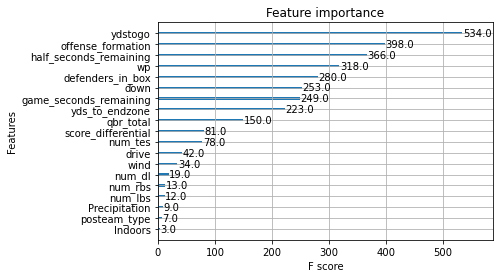

In [63]:
from xgboost import plot_importance
plot_importance(model)

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler

In [65]:
nfl_final.head()

,posteam,posteam_type,half_seconds_remaining,game_seconds_remaining,down,ydstogo,score_differential,wp,surface,wind,play_type,drive,offense_formation,defenders_in_box,yds_to_endzone,Precipitation,Offense_HC,Indoors,num_rbs,num_tes,num_dl,num_lbs,qbr_total
0,BAL,1.0,1797.0,3597.0,1.0,10.0,0.0,0.536378,grass,8.0,0.0,1.0,I_FORM,8.0,86.0,None,John Harbaugh,0.0,2.0,1.0,4.0,3.0,50.799999
1,BAL,1.0,1772.0,3572.0,2.0,4.0,0.0,0.541975,grass,8.0,1.0,1.0,SHOTGUN,6.0,80.0,None,John Harbaugh,0.0,2.0,1.0,4.0,3.0,50.799999
2,BAL,1.0,1741.0,3541.0,1.0,10.0,0.0,0.546262,grass,8.0,0.0,1.0,SHOTGUN,7.0,75.0,None,John Harbaugh,0.0,2.0,1.0,4.0,3.0,50.799999
3,BAL,1.0,1715.0,3515.0,2.0,10.0,0.0,0.528030,grass,8.0,1.0,1.0,I_FORM,7.0,75.0,None,John Harbaugh,0.0,2.0,1.0,4.0,3.0,50.799999
4,BAL,1.0,1674.0,3474.0,3.0,1.0,0.0,0.561710,grass,8.0,0.0,1.0,I_FORM,8.0,66.0,None,John Harbaugh,0.0,1.0,2.0,4.0,3.0,50.799999


In [66]:
categorical_cols = ['offense_formation', 'Precipitation']
scale_cols = ['half_seconds_remaining', 'game_seconds_remaining', 'down', 'ydstogo', 'score_differential',
               'wind', 'drive', 'defenders_in_box', 'yds_to_endzone', 'num_rbs', 'num_tes', 'num_dl', 'num_lbs',
               'qbr_total']

In [68]:
scaler = StandardScaler()
nfl_scaled = nfl_input.copy()
nfl_scaled[scale_cols] = scaler.fit_transform(nfl_scaled[scale_cols])

In [69]:
# with scaled
dummies = pd.get_dummies(nfl_scaled[categorical_cols])
nfl_scaled_dummies = pd.concat([nfl_scaled, dummies], axis=1).drop(categorical_cols, axis = 1)

In [70]:
# with unscaled
dummies_unscaled = pd.get_dummies(nfl_input[categorical_cols])
nfl_unscaled_dummies = pd.concat([nfl_input, dummies_unscaled], axis=1).drop(categorical_cols, axis = 1)

In [71]:
nfl_scaled_dummies

,posteam_type,half_seconds_remaining,game_seconds_remaining,down,ydstogo,score_differential,wp,wind,drive,defenders_in_box,yds_to_endzone,Indoors,num_rbs,num_tes,num_dl,num_lbs,qbr_total,offense_formation_EMPTY,offense_formation_I_FORM,offense_formation_JUMBO,offense_formation_PISTOL,offense_formation_SHOTGUN,offense_formation_SINGLEBACK,offense_formation_WILDCAT,Precipitation_None,Precipitation_Rain,Precipitation_Snow
0,1.0,1.757209,1.777931,-0.962289,0.370768,0.152922,0.536378,0.599008,-1.563845,1.513544,1.425343,0.0,2.522873,-0.477493,0.824287,0.115059,-0.950604,False,True,False,False,False,False,False,True,False,False
1,1.0,1.711164,1.754057,0.251929,-1.135162,0.152922,0.541975,0.599008,-1.563845,-0.343370,1.180202,0.0,2.522873,-0.477493,0.824287,0.115059,-0.950604,False,False,False,False,True,False,False,True,False,False
2,1.0,1.654069,1.724453,-0.962289,0.370768,0.152922,0.546262,0.599008,-1.563845,0.585087,0.975917,0.0,2.522873,-0.477493,0.824287,0.115059,-0.950604,False,False,False,False,True,False,False,True,False,False
3,1.0,1.606183,1.699624,0.251929,0.370768,0.152922,0.528030,0.599008,-1.563845,0.585087,0.975917,0.0,2.522873,-0.477493,0.824287,0.115059,-0.950604,False,True,False,False,False,False,False,True,False,False
4,1.0,1.530670,1.660471,1.466147,-1.888126,0.152922,0.561710,0.599008,-1.563845,1.513544,0.608205,0.0,-0.309658,1.245727,0.824287,0.115059,-0.950604,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237056,0.0,-1.152799,-1.449847,1.466147,-1.888126,0.152922,0.485626,-0.812721,0.813338,1.513544,0.077066,1.0,2.522873,-0.477493,0.824287,0.115059,0.661095,False,True,False,False,False,False,False,True,False,False
237057,0.0,-1.230154,-1.489955,-0.962289,0.370768,0.152922,0.565224,-0.812721,0.813338,-0.343370,-0.331503,1.0,-0.309658,2.968947,0.824287,0.115059,0.661095,False,False,False,False,True,False,False,True,False,False
237058,0.0,-1.318560,-1.535793,-0.962289,0.370768,0.152922,0.737546,-0.812721,0.813338,1.513544,-1.393782,1.0,-0.309658,2.968947,1.928389,-0.988205,0.661095,False,False,False,False,False,True,False,True,False,False
237059,0.0,-1.331452,-1.542478,0.251929,-0.131209,0.152922,0.727041,-0.812721,0.813338,-0.343370,-1.475495,1.0,-0.309658,-0.477493,0.824287,-0.988205,0.661095,False,False,False,False,True,False,False,True,False,False


In [72]:
nfl_scaled_dummies.shape

(237061, 27)

In [73]:
X = nfl_scaled_dummies.values
X = np.asarray(X).astype(np.float32)
y = nfl_output.values
y = np.asarray(y).astype(np.float32)

In [74]:
nfl_scaled_dummies.dtypes

posteam_type                    float32
half_seconds_remaining          float32
game_seconds_remaining          float32
down                            float32
ydstogo                         float32
score_differential              float32
wp                              float32
wind                            float32
drive                           float32
defenders_in_box                float32
yds_to_endzone                  float32
Indoors                         float32
num_rbs                         float32
num_tes                         float32
num_dl                          float32
num_lbs                         float32
qbr_total                       float32
offense_formation_EMPTY            bool
offense_formation_I_FORM           bool
offense_formation_JUMBO            bool
offense_formation_PISTOL           bool
offense_formation_SHOTGUN          bool
offense_formation_SINGLEBACK       bool
offense_formation_WILDCAT          bool
Precipitation_None                 bool


In [75]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 22)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 22)

In [76]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

2024-02-20 18:50:05.656924: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [77]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = ['accuracy'])

In [78]:
model.fit(X_train, y_train, batch_size = 128, epochs=10, validation_data = (X_valid, y_valid))

Epoch 1/10
1112/1112 [==============================] - 4s 3ms/step - loss: 0.5399 - accuracy: 0.7295 - val_loss: 0.5287 - val_accuracy: 0.7330
Epoch 2/10
1112/1112 [==============================] - 3s 3ms/step - loss: 0.5294 - accuracy: 0.7362 - val_loss: 0.5257 - val_accuracy: 0.7340
Epoch 3/10
1112/1112 [==============================] - 3s 3ms/step - loss: 0.5257 - accuracy: 0.7371 - val_loss: 0.5245 - val_accuracy: 0.7368
Epoch 4/10
1112/1112 [==============================] - 3s 3ms/step - loss: 0.5235 - accuracy: 0.7381 - val_loss: 0.5217 - val_accuracy: 0.7371
Epoch 5/10
1112/1112 [==============================] - 3s 3ms/step - loss: 0.5227 - accuracy: 0.7392 - val_loss: 0.5188 - val_accuracy: 0.7387
Epoch 6/10
1112/1112 [==============================] - 3s 3ms/step - loss: 0.5215 - accuracy: 0.7393 - val_loss: 0.5215 - val_accuracy: 0.7373
Epoch 7/10
1112/1112 [==============================] - 3s 3ms/step - loss: 0.5201 - accuracy: 0.7405 - val_loss: 0.5214 - val_accuracy:

In [79]:
model.evaluate(X_test, y_test)

1482/1482 [==============================] - 1s 687us/step - loss: 0.5201 - accuracy: 0.7400


[0.520086407661438, 0.7399868965148926]

In [80]:
sum(y_test)/len(y_test) # baseline is 58% - accuracy if all yes

0.5862948980237488